In [37]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import csv
import io
import math
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [38]:
def countrow(filename):
    row_count = 0
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

In [39]:
def delete_csv(csv_path='output.csv'):
    if os.path.exists(csv_path):
      os.remove(csv_path)

In [40]:
def delete_row_csv(input_csv_file,output_csv_file,column_to_delete,need_to_delete=False):
    delete_csv(output_csv_file)
    with open(input_csv_file, 'r', encoding='utf-8') as read_obj, \
         open(output_csv_file, 'w', encoding='utf-8', newline='') as write_obj:
        csv_reader = csv.reader(read_obj)
        csv_writer = csv.writer(write_obj)

        for row in csv_reader:
            if(len(row)==0):
                continue
            if need_to_delete:
                del row[column_to_delete]
            csv_writer.writerow(row)

In [41]:
def create_backup_csv(input_csv_file='csv_data/all_song_features_csv.csv',output_csv_file='backup_csv/backup_all_song_features_csv.csv',column_to_delete=1,need_to_delete=False):
    delete_row_csv(input_csv_file,output_csv_file,column_to_delete,need_to_delete)

In [90]:
def two_d_plot_data(csv_path, first_element_index, second_element_index, first_element_multiplier, second_element_multiplier, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    pos_x = []
    pos_y = []
    neg_x = []
    neg_y = []
    
    labels = ["Country",
              "Song Name",
              "Popularity",
              "Time Signature",
              "Duration MS",
              "Tempo",
              "Valence",
              "Liveness",
              "Instrumentalness",
              "Acousticness",
              "Speechiness",
              "Loudness",
              "Key",
              "Mode",
              "Energy",
              "Danceability",]

    with open(csv_path, 'r', encoding='utf-8') as read_obj:
        csv_reader = csv.reader(read_obj)
        for row in csv_reader:
            if(row[0] == '1'):
                pos_x.append(float(row[first_element_index])*first_element_multiplier + 1.0)
                pos_y.append(float(row[second_element_index])*second_element_multiplier + 1.0)
            elif(row[0] == '0'):
                neg_x.append(float(row[first_element_index])*first_element_multiplier + 1.0)
                neg_y.append(float(row[second_element_index])*second_element_multiplier + 1.0)
         
    print(len(pos_x),len(neg_x))
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()

    axes.scatter(pos_x, pos_y, marker='+', c='red', label=label_pos)
    axes.scatter(neg_x, neg_y, marker='^', c='cyan', label=label_neg)
    
    axes.set_xlabel(labels[first_element_index])
    axes.set_ylabel(labels[second_element_index])
    
    axes.legend(frameon= True, fancybox = True);

In [81]:
# input_csv_file
bangladesh_csv_path = 'csv_data/bangladesh_song_features_csv.csv'
kolkata_csv_path = 'csv_data/kolkata_song_features_csv.csv'
all_csv_path = 'csv_data/all_song_features_csv.csv'

# Backup output_csv_file
bangladesh_backup_csv_path = 'backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = 'backup_csv/backup_kolkata_song_features_csv.csv'
all_backup_csv_path = 'backup_csv/backup_all_song_features_csv.csv'

# Column to delete [max 15]
column_to_delete = 16

# create_backup_csv
create_backup_csv(all_csv_path,all_backup_csv_path,None,None)

82 54


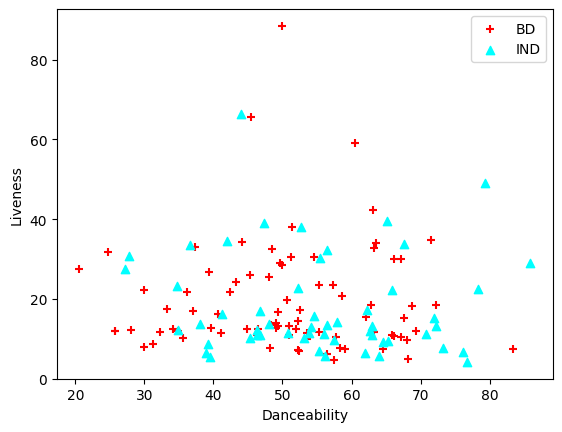

In [112]:
multipliers = [0,0,1,1,1,1,100,100,100,100,1000,10,2,1,100,100]

# 2 - 15
first_element_index  = 15
second_element_index = 7

# print(multipliers[first_element_index], multipliers[second_element_index])

two_d_plot_data(all_backup_csv_path, first_element_index, second_element_index, multipliers[first_element_index], multipliers[second_element_index], 'BD', 'IND')

82 54


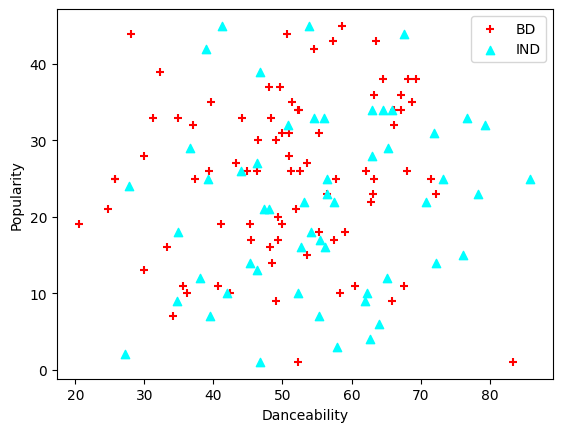

In [113]:
multipliers = [0,0,1,1,1,1,100,100,100,100,1000,10,2,1,100,100]

# 2 - 15
first_element_index  = 15
second_element_index = 2

# print(multipliers[first_element_index], multipliers[second_element_index])

two_d_plot_data(all_backup_csv_path, first_element_index, second_element_index, multipliers[first_element_index], multipliers[second_element_index], 'BD', 'IND')

In [68]:
import pandas as pd
data = pd.read_csv(all_backup_csv_path)

# Check the data type of each column
# print(data.dtypes)
data.head()

,Country,Song Name,Popularity,Time Signature,Duration MS,Tempo,Valence,Liveness,Instrumentalness,Acousticness,Speechiness,Loudness,Key,Mode,Energy,Danceability
0,1,Abar Black Album Abar Bangla Band Song Officia...,15.0,4.0,220543.0,178.116,0.543,0.1640,0.000221,0.01240,0.0818,-5.232,1.0,1.0,0.890,0.323
1,1,Abar Hashimukh - Shironamhin [Lyrics Video].wav,25.0,3.0,336500.0,155.853,0.302,0.2570,0.000025,0.16500,0.0418,-7.829,2.0,0.0,0.604,0.383
2,1,Amar Prithibi Black Album Amar Prithibi Offici...,25.0,4.0,251844.0,159.316,0.462,0.0998,0.000808,0.00369,0.0333,-12.894,1.0,1.0,0.432,0.453
3,1,Anmone - Aushomapto - Aurthohin.wav,14.0,4.0,327912.0,164.991,0.425,0.0901,0.000015,0.00375,0.0312,-7.327,1.0,1.0,0.667,0.526
4,1,Anmone 2 - Aushomapto 2 - Aurthohin.wav,38.0,4.0,305862.0,88.734,0.372,0.1070,0.000001,0.00367,0.0844,-5.781,3.0,1.0,0.897,0.313


In [91]:
def three_d_plot_data(csv_path, first_element_index, second_element_index, third_element_index, first_element_multiplier, second_element_multiplier, third_element_multiplier, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    pos_x = []
    pos_y = []
    pos_z = []
    neg_x = []
    neg_y = []
    neg_z = []
    
    labels = ["Country",
              "Song Name",
              "Popularity",
              "Time Signature",
              "Duration MS",
              "Tempo",
              "Valence",
              "Liveness",
              "Instrumentalness",
              "Acousticness",
              "Speechiness",
              "Loudness",
              "Key",
              "Mode",
              "Energy",
              "Danceability",]

    with open(csv_path, 'r', encoding='utf-8') as read_obj:
        csv_reader = csv.reader(read_obj)
        for row in csv_reader:
            if(row[0]=='1'):
                pos_x.append(float(row[first_element_index])*first_element_multiplier + 1.0)
                pos_y.append(float(row[second_element_index])*second_element_multiplier + 1.0)
                pos_z.append(float(row[third_element_index])*third_element_multiplier + 1.0)
            elif(row[0]=='0'):
                neg_x.append(float(row[first_element_index])*first_element_multiplier + 1.0)
                neg_y.append(float(row[second_element_index])*second_element_multiplier + 1.0)
                neg_z.append(float(row[third_element_index])*third_element_multiplier + 1.0)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pos_x, pos_y, pos_z)
    ax.scatter(neg_x, neg_y, neg_z)

    # Set axis labels
    ax.set_xlabel(labels[first_element_index])
    ax.set_ylabel(labels[second_element_index])
    ax.set_zlabel(labels[third_element_index])
    plt.show()

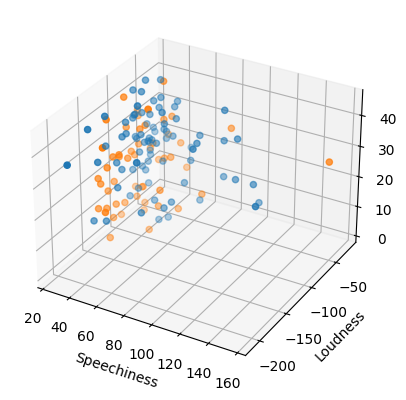

In [108]:
multipliers = [0,0,1,1,1,1,100,100,100,100,1000,10,2,2,100,100]

# 2 - 15
first_element_index  = 10
second_element_index = 11
third_element_index = 2

# print(multipliers[first_element_index], multipliers[second_element_index]), multipliers[third_element_index])

three_d_plot_data(all_backup_csv_path, first_element_index, second_element_index, third_element_index, multipliers[first_element_index], multipliers[second_element_index], multipliers[third_element_index], 'BD', 'IND')